In [5]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Thesis Cloud Images /pics_0402_0406.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sky_images/')


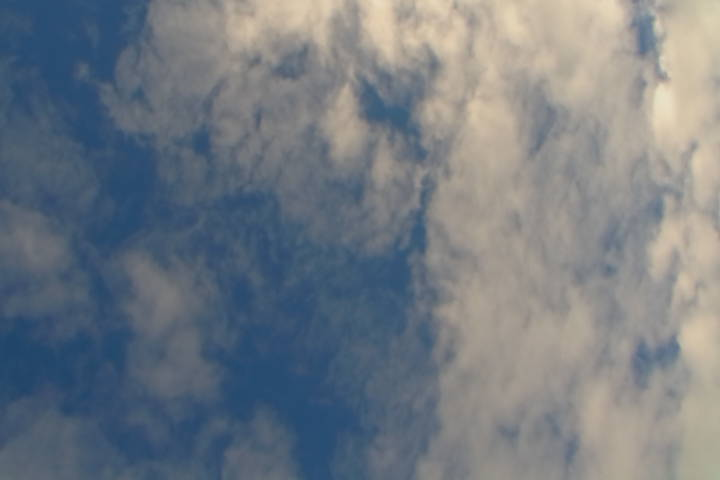

In [7]:
import cv2

img = cv2.imread('/content/sky_images/pics/202304041452.jpg')
cv2_imshow(img)


In [8]:
import cv2
import numpy as np

# Load the image
#img = cv2.imread('cloud_image.jpg')

# Define the size of the grid
num_rows = 10
num_cols = 10

# Compute the size of each grid
height, width, _ = img.shape
grid_height = height // num_rows
grid_width = width // num_cols

# Convert the image from BGR to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Set the histogram parameters
hist_size = [180, 256]
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges

# Initialize the feature matrix
num_grids = num_rows * num_cols
feature_matrix = np.zeros((num_grids, hist_size[0] * hist_size[1]))

# Compute the color histogram for each grid
for row in range(num_rows):
    for col in range(num_cols):
        # Compute the grid boundaries
        y1 = row * grid_height
        y2 = (row + 1) * grid_height
        x1 = col * grid_width
        x2 = (col + 1) * grid_width
        
        # Extract the grid from the image
        grid = hsv_img[y1:y2, x1:x2, :]
        
        # Compute the color histogram for the grid
        hist = cv2.calcHist([grid], [0, 1], None, hist_size, ranges, accumulate=False)
        
        # Normalize the histogram
        cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        
        # Flatten the histogram into a feature vector
        feature_vector = hist.flatten()
        
        # Store the feature vector in the feature matrix
        idx = row * num_cols + col
        feature_matrix[idx, :] = feature_vector


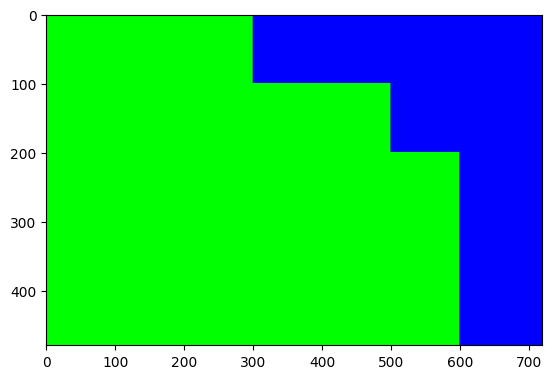

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/sky_images/pics/202304041452.jpg')

# Define grid size
grid_size = 100

# Define function to extract color features
def get_color_feature(grid):
    color_feature = cv2.mean(grid)
    return color_feature

# Calculate threshold value
avg_intensity = cv2.mean(img)[0]
threshold_value = avg_intensity * 1.1


# Loop through each grid and label as cloud or sky
for i in range(0, img.shape[0], grid_size):
    for j in range(0, img.shape[1], grid_size):
        grid = img[i:i+grid_size, j:j+grid_size]
        color_feature = get_color_feature(grid)
        if color_feature[0] > threshold_value:
            # Grid is a cloud
            cv2.rectangle(img, (j, i), (j+grid_size, i+grid_size), (255, 0, 0), -1)
        else:
            # Grid is sky
            cv2.rectangle(img, (j, i), (j+grid_size, i+grid_size), (0, 255, 0), -1)

# Plot segmented image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


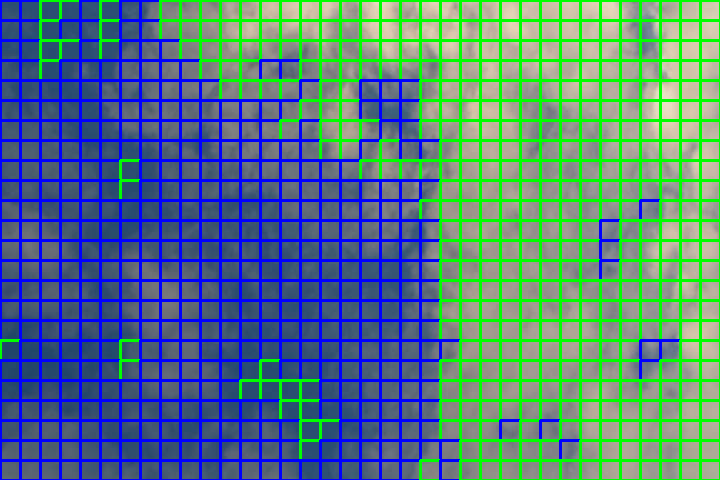

In [23]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

# Load the image
img = cv2.imread('/content/sky_images/pics/202304041452.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the grid size
grid_size = 20

# Initialize the cloud and sky grids
cloud_grid = np.zeros((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)
sky_grid = np.ones((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)

# Compute the color features and texture features for each grid
for i in range(cloud_grid.shape[0]):
    for j in range(cloud_grid.shape[1]):
        # Extract the grid from the grayscale image
        grid = gray[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size]
        
        # Compute the mean color of the grid
        mean_color = np.mean(img[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size], axis=(0,1))
        
        # Compute the texture features of the grid using the LBP algorithm
        lbp = local_binary_pattern(grid, 8, 1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
        texture_features = hist / np.sum(hist)
        
        # Apply the color and texture thresholds to classify the grid as cloud or sky
        if (mean_color[0] > 100 and mean_color[1] > 100 and mean_color[2] > 100) or np.max(texture_features) > 0.5:
            sky_grid[i, j] = 0
            color = (0, 255, 0)  # green
        else:
            cloud_grid[i, j] = 1
            color = (255, 0, 0)  # blue
            
        # Draw the grid on the original image
        cv2.rectangle(img, (j*grid_size, i*grid_size), ((j+1)*grid_size, (i+1)*grid_size), color, 2)

# Display the resulting image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


<ipython-input-36-9eaf16ffef05>:39: RuntimeWarning: invalid value encountered in true_divide
  edge_features = (sobel_mag - sobel_mean) / sobel_std


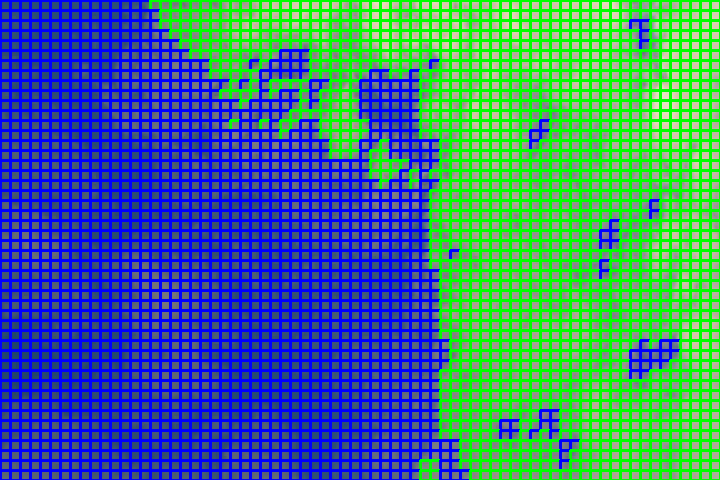

In [36]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.filters import sobel_h, sobel_v

# Load the image
img = cv2.imread('/content/sky_images/pics/202304041452.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the grid size
grid_size = 10

# Initialize the cloud and sky grids
cloud_grid = np.zeros((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)
sky_grid = np.ones((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)

# Compute the color features, texture features, and edge features for each grid
for i in range(cloud_grid.shape[0]):
    for j in range(cloud_grid.shape[1]):
        # Extract the grid from the grayscale image
        grid = gray[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size]
        
        # Compute the mean color of the grid
        mean_color = np.mean(img[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size], axis=(0,1))
        
        # Compute the texture features of the grid using the LBP algorithm
        lbp = local_binary_pattern(grid, 8, 1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
        texture_features = hist / np.sum(hist)
        
        # Compute the edge features of the grid using the Sobel filters
        sobel_x = sobel_h(grid)
        sobel_y = sobel_v(grid)
        sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel_mean = np.mean(sobel_mag)
        sobel_std = np.std(sobel_mag)
        edge_features = (sobel_mag - sobel_mean) / sobel_std
        
        # Apply the color, texture, and edge thresholds to classify the grid as cloud or sky
        if (mean_color[0] > 80 and mean_color[1] > 80 and mean_color[2] > 80) or np.max(texture_features) > 0.7 or np.max(edge_features) > 100:
            sky_grid[i, j] = 0
            color = (0, 255, 0)  # green
        else:
            cloud_grid[i, j] = 1
            color = (255, 0, 0)  # blue
            
        # Draw the grid on the original image
        cv2.rectangle(img, (j*grid_size, i*grid_size), ((j+1)*grid_size, (i+1)*grid_size), color, 2)

# Display the resulting image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import os

# Define the grid size
grid_size = 20

# Loop through each image in the folder
for file_name in os.listdir('/content/sky_images/pics'):
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join('/path/to/folder', file_name))
        
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Initialize the cloud and sky grids
        cloud_grid = np.zeros((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)
        sky_grid = np.ones((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)

        # Compute the color features and texture features for each grid
        for i in range(cloud_grid.shape[0]):
            for j in range(cloud_grid.shape[1]):
                # Extract the grid from the grayscale image
                grid = gray[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size]

                # Compute the mean color of the grid
                mean_color = np.mean(img[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size], axis=(0,1))

                # Compute the texture features of the grid using the LBP algorithm
                lbp = local_binary_pattern(grid, 8, 1, method='uniform')
                hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
                texture_features = hist / np.sum(hist)

                # Apply the color and texture thresholds to classify the grid as cloud or sky
                if (mean_color[0] > 80 and mean_color[1] > 80 and mean_color[2] > 80) or np.max(texture_features) > 0.7 or np.max(edge_features) > 100:
                    sky_grid[i, j] = 0
                else:
                    cloud_grid[i, j] = 1

                # Draw the grid on the original image
                cv2.rectangle(img, (j*grid_size, i*grid_size), ((j+1)*grid_size, (i+1)*grid_size), (0, 255, 0), 2)

        # Save the labeled image in a separate folder
        labeled_file_name = os.path.splitext(file_name)[0] + '_labeled.jpg'
        cv2.imwrite(os.path.join('/path/to/labeled_folder', labeled_file_name), img)


In [ ]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.filters import sobel_h, sobel_v

# Load the image
img = cv2.imread('/content/sky_images/pics/202304041452.jpg')


for file_name in os.listdir()
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the grid size
grid_size = 10

# Initialize the cloud and sky grids
cloud_grid = np.zeros((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)
sky_grid = np.ones((gray.shape[0] // grid_size, gray.shape[1] // grid_size), dtype=np.uint8)

# Compute the color features, texture features, and edge features for each grid
for i in range(cloud_grid.shape[0]):
    for j in range(cloud_grid.shape[1]):
        # Extract the grid from the grayscale image
        grid = gray[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size]
        
        # Compute the mean color of the grid
        mean_color = np.mean(img[i*grid_size:(i+1)*grid_size, j*grid_size:(j+1)*grid_size], axis=(0,1))
        
        # Compute the texture features of the grid using the LBP algorithm
        lbp = local_binary_pattern(grid, 8, 1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 256), range=(0, 255))
        texture_features = hist / np.sum(hist)
        
        # Compute the edge features of the grid using the Sobel filters
        sobel_x = sobel_h(grid)
        sobel_y = sobel_v(grid)
        sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel_mean = np.mean(sobel_mag)
        sobel_std = np.std(sobel_mag)
        edge_features = (sobel_mag - sobel_mean) / sobel_std
        
        # Apply the color, texture, and edge thresholds to classify the grid as cloud or sky
        if (mean_color[0] > 80 and mean_color[1] > 80 and mean_color[2] > 80) or np.max(texture_features) > 0.7 or np.max(edge_features) > 100:
            sky_grid[i, j] = 0
            color = (0, 255, 0)  # green
        else:
            cloud_grid[i, j] = 1
            color = (255, 0, 0)  # blue
            
        # Draw the grid on the original image
        cv2.rectangle(img, (j*grid_size, i*grid_size), ((j+1)*grid_size, (i+1)*grid_size), color, 2)



'''
# Display the resulting image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''